# Mushroom Classification

## Importing Relevant Libraries

In [565]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#Relevant Preprocessing Libraries
from sklearn.model_selection import train_test_split
 
#Relevant Model Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Relevant Evaluation Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Setting Seaborn as Default Visualization Library
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Loading Data

In [566]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Data_Akshay\\mushrooms.csv')

## 1. Exploring and Visualizing the Loaded Data

## 1.1. Data Exploration

In [567]:
#Exploring the Head Rows in the Data Set
data_raw.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [568]:
#Exploring the Tail Rows in the Data Set
data_raw.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [569]:
#Exploring the Columns in the Data Set
data_raw.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [570]:
#Exploring the Data Types in the Data Set
data_raw.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [571]:
#Exploring the Shape of the Data Set
data_raw.shape

(8124, 23)

In [572]:
#Exploring the Discrete Statistics of the Data Set
data_raw.describe(include = 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 1.2. Data Visualization

#### Cap Shape Variable; Count Plot

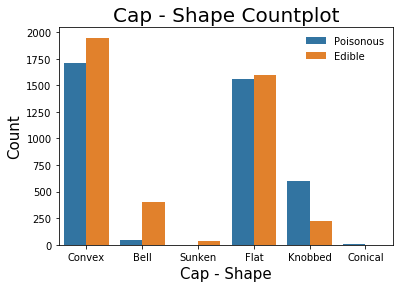

In [573]:
#Let's plot a Countplot for Variable Cap Shape
fig = sns.countplot(x= 'cap-shape', hue= 'class', data= data_raw)
plt.title('Cap - Shape Countplot', size= 20)
plt.xlabel('Cap - Shape', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['Convex', 'Bell', 'Sunken', 'Flat', 'Knobbed', 'Conical'])
fig.legend(['Poisonous', 'Edible'], frameon= False)
plt.show()

In [574]:
data_raw['cap-shape'].value_counts().to_dict()

{'x': 3656, 'f': 3152, 'k': 828, 'b': 452, 's': 32, 'c': 4}

#### Cap Surface Variable; Count Plot

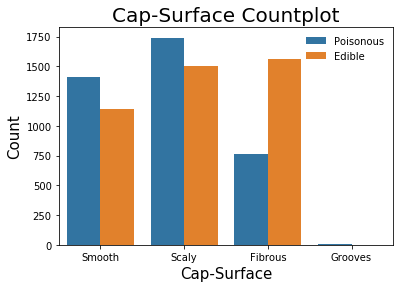

In [575]:
#Let's plot a Countplot for Variable Cap Surface
fig = sns.countplot(x= 'cap-surface', hue= 'class', data= data_raw)
plt.title('Cap-Surface Countplot', size= 20)
plt.xlabel('Cap-Surface', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['Smooth', 'Scaly', 'Fibrous', 'Grooves'])
fig.legend(['Poisonous', 'Edible'], loc= 'upper right', frameon= False)
plt.show()

In [576]:
data_raw['cap-surface'].value_counts().to_dict()

{'y': 3244, 's': 2556, 'f': 2320, 'g': 4}

#### Cap Color Variable; Countplot

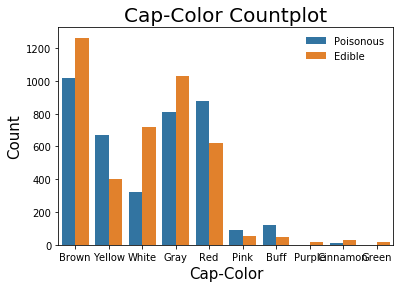

In [577]:
#Let's plot a Countplot for Variable Cap Color
fig = sns.countplot(x= 'cap-color', hue= 'class', data= data_raw)
plt.title('Cap-Color Countplot', size= 20)
plt.xlabel('Cap-Color', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['Brown', 'Yellow', 'White', 'Gray', 'Red', 'Pink', 'Buff', 'Purple', 'Cinnamon', 'Green'])
fig.legend(['Poisonous', 'Edible'], loc= 'upper right', frameon= False)
plt.show()

In [578]:
data_raw['cap-color'].value_counts().to_dict()

{'n': 2284,
 'g': 1840,
 'e': 1500,
 'y': 1072,
 'w': 1040,
 'b': 168,
 'p': 144,
 'c': 44,
 'u': 16,
 'r': 16}

#### Bruises; Countplot

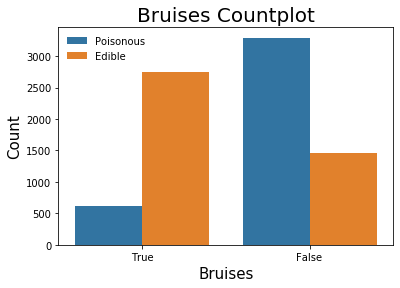

In [579]:
#Let's plot a Countplot for Variable Bruiess
fig = sns.countplot(x= 'bruises', hue= 'class', data= data_raw)
plt.title('Bruises Countplot', size= 20)
plt.xlabel('Bruises', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['True', 'False'])
fig.legend(['Poisonous', 'Edible'], loc= 'upper left', frameon= False)
plt.show()

In [580]:
data_raw['bruises'].value_counts().to_dict()

{'f': 4748, 't': 3376}

### Odor; Countplot

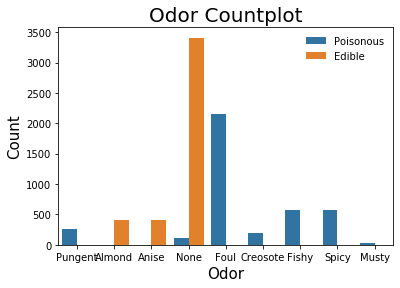

In [581]:
#Let's plot a Countplot for Variable Odor
fig = sns.countplot(x= 'odor', hue= 'class', data= data_raw)
plt.title('Odor Countplot', size= 20)
plt.xlabel('Odor', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['Pungent', 'Almond', 'Anise', 'None', 'Foul', 'Creosote', 'Fishy', 'Spicy', 'Musty'])
fig.legend(['Poisonous', 'Edible'], loc= 'upper right', frameon= False)
plt.show()

In [582]:
data_raw['odor'].value_counts(). to_dict()

{'n': 3528,
 'f': 2160,
 'y': 576,
 's': 576,
 'a': 400,
 'l': 400,
 'p': 256,
 'c': 192,
 'm': 36}

### Population; Piechart

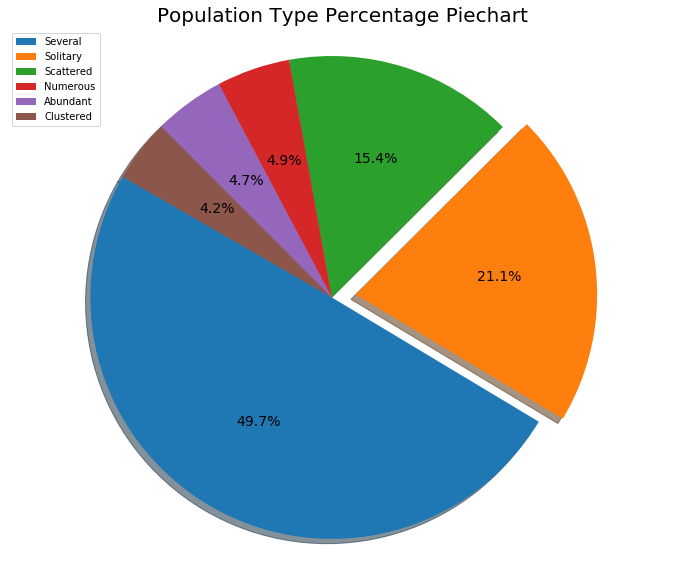

In [583]:
#Preparing data for piechart
pop_size = data_raw['population'].value_counts().values.tolist() #Extracting Population value counts and converting it into a list.
pop_types = data_raw['population'].value_counts().axes[0].tolist() #Extracting Population types
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered' #Manually creating a String of labels 
explode = (0, 0.1, 0, 0, 0, 0) #Manually creating Explode Values

#Plotting Piechart for Variable Population
fig = plt.figure(figsize=(12,10))
patches, texts, autotexts = plt.pie(pop_size, explode=explode, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('Population Type Percentage Piechart', size= 20)
plt.legend(patches, pop_labels)
for autotext in autotexts: #autotexts = autopct values
    autotext.set_fontsize(14)
    
plt.axis('equal')
plt.show()

### Population x Class; Nested Piechart 

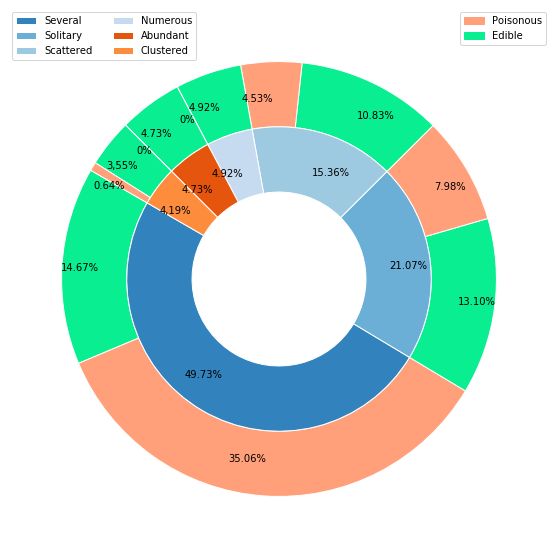

In [584]:
#Preparing Data for the Nested Piechart
poisonous_pop = [] #Empty List for Poisonous Mushrooms Population
edible_pop = [] #Empty List for Edible Mushrooms Population

for pop in pop_types: #pop_types = ['v', 'y', 's', 'n', 'a', 'c']
    size = len(data_raw[data_raw['population'] == pop].index) #Getting size of each population type
    edibles = len(data_raw[(data_raw['population'] == pop) & (data_raw['class'] == 'e')].index) #Getting size of edible mushrooms of each population type
    edible_pop.append(edibles) 
    poisonous_pop.append(size-edibles)

combine_ed_poi = [] #Empty List for Combined Edible and Poisonous Mushrooms Population Sizes

for i in range(0, len(edible_pop)): #range(0, 6)
    combine_ed_poi.append([edible_pop[i], poisonous_pop[i]])
    
pops = np.array(combine_ed_poi) #Converting the combine_ed_poi List into an Array
popsnorm = pops/np.sum(pops)*2*np.pi #Normalizing the pops Array

#Preparing Few datas manually
percentages_e_p = '14.67%', '35.06%', '13.10%', '7.98%', '10.83%', '4.53%', '4.92%', '0%', '4.73%', '0%', '3,55%', '0.64%'
pop_pct = '49.73%', '21.07%', '15.36%', '4.92%', '4.73%', '4,19%'

#Setting Standard Values for the Plot
cmap = plt.cm.get_cmap("tab20c") #Getting Color Table 'tab20c'
inner_colors = cmap(np.arange(6)) #Getting 6 Colors for 6 Population Types
outer_colors = ['#09ee90', '#ffa07a'] #Setting Collors for Mushroom Classes
outer_colors_patches = [mpatches.Patch(color='#ffa07a', label= 'Poisonous'), mpatches.Patch(color='#09ee90', label= 'Edible')] #Setting Calss Legend Heading

#Now, Let's Plot...
fig, ax = plt.subplots(figsize=(20, 10)) #Setting Figure Size
size = 0.3 #Setting wedgeprop wedth size; this value helps in creating the Doughnut Shape for the Nested Piechart

##Outer Piechart; values=pops, labels=percentages_e_p, colors=outer_colors
ax.pie(pops.flatten(), radius=1, labels= percentages_e_p, labeldistance= 0.83, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), startangle=150)
##Inner Piechart; values=sum of pops, labels=pct, colors=inner_colors
patches, texts = ax.pie(pops.sum(axis=1), radius=1-size, labels= pop_pct, labeldistance= 0.73, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), startangle=150)
##Legend for Class/Outer Piechart
legend1 = plt.legend(handles = outer_colors_patches, loc="upper right")
##Legend for Population/Inner Piechart
legend2 = plt.legend(patches, pop_labels, loc="upper left", ncol=2)

plt.gca().add_artist(legend1)
ax.set(aspect='equal')
plt.show()

In [585]:
data_raw['habitat'].value_counts().axes[0].tolist()

['d', 'g', 'p', 'l', 'u', 'm', 'w']

In [586]:
'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'

('Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste')

### Habitat; Piechart

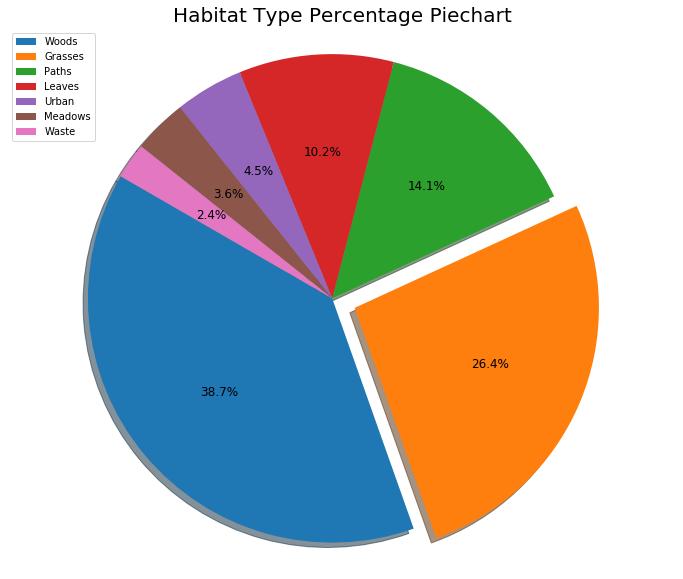

In [587]:
#Preparing data for piechart
hab_size = data_raw['habitat'].value_counts().values.tolist() #Extarcting Habitat Value Counts and Converting it into a List
hab_types = data_raw['habitat'].value_counts().axes[0].tolist() #Extracting Habitat Types and Converting it into a List
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste' #Manually creating a String of Labels
explode = (0, 0.1, 0, 0, 0, 0, 0)

#Plotting Piechart for Variable Habitat
fig = plt.figure(figsize=(12,10))
patches, texts, autotexts = plt.pie(hab_size, explode=explode, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('Habitat Type Percentage Piechart', size=20)
plt.legend(patches, hab_labels, loc= 'upper left')
for autotext in autotexts: #autotexts = autopct values
    autotext.set_fontsize(12)
    
plt.axis('equal')
plt.show()

### Habitat x Classes; Nested Piechart

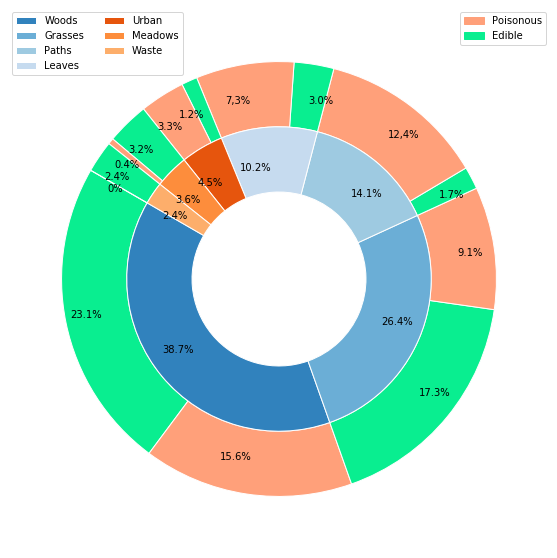

In [588]:
#Preparing Data for the Nested Piechart
poisonous_hab = [] #Empty List for Poisonous Mushrooms Habitat
edible_hab = [] #Empty List for Edible Mushrooms Habitat

for hab in hab_types: #hab_types = ['d', 'g', 'p', 'l', 'u', 'm', 'w']
    size = len(data_raw[data_raw['habitat'] == hab].index) #Getting size of each habitat type
    edibles = len(data_raw[(data_raw['habitat'] == hab) & (data_raw['class'] == 'e')].index) #Getting size of edible mushrooms of each habitat type
    edible_hab.append(edibles)
    poisonous_hab.append(size-edibles)
    
combined_hab = [] #Empty List for Combined Edible and Poisonous Mushrooms Habitat Sizes

for i in range(0, len(edible_hab)): #range(0, 7)
    combined_hab.append([edible_hab[i], poisonous_hab[i]])

habs = np.array(combined_hab) #Converting the cobined_hab List into an Array   
habsnorm = habs/np.sum(habs)*2*np.pi #Normalizing the habs Array

#Preparing Few datas manually
combined_habsperc = '23.1%', '15.6%', '17.3%', '9.1%', '1.7%', '12,4%', '3.0%', '7,3%', '1.2%', '3.3%', '3.2%', '0.4%', '2.4%', '0%'
habsperc = '38.7%', '26.4%', '14.1%', '10.2%', '4.5%', '3.6%', '2.4%'

#Setting Standard Values for the Plot
#Outer_colors = ['09ee90', '#ffa07a'] already set
inner_colors = cmap(np.arange(7)) #Getting 7 Colors for 7 Habitat Types
 
#Now, Let's plot...
fig, ax = plt.subplots(figsize=(20,10)) #Setting Figure Size
size = 0.3 #Setting wedgegroup width size; this value helps in creating the Doughnut Shape for the Nested Piechart

##Outer Piechart; values=habs, labels=combined_habsperc, colors=outer_colors
ax.pie(habs.flatten(), radius=1, labels=combined_habsperc, labeldistance=0.83, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), startangle=150)
##Inner Piechart; values=sum of habs, labels=habsperc, colors=inner_colors
patches, texts = ax.pie(habs.sum(axis=1), radius=1-size, labels=habsperc, labeldistance=0.73, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), startangle=150)
##Legend for Class/Outer Piechart
legend1 = plt.legend(handles = outer_colors_patches, loc='upper right')
##Legend for Habitat/Inner Piechart
legend2 = plt.legend(patches, hab_labels, loc='upper left', ncol=2)

plt.gca().add_artist(legend1)
ax.set(aspect='equal')
plt.show()

## 2. Feature Engineering

### 2.1. Dealing with Dummies

In [687]:
#Converting all Categorical Values into Dummy Variables
data_with_dummies = pd.get_dummies(data_raw, drop_first=True)

In [688]:
data_with_dummies

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


## 3. Data Preparation

## 3.1. Describing Targets and Features

In [694]:
#Describing Class as Targets
targets = data_with_dummies['class_p']
#Describing other variables than class as Features
features = data_with_dummies.drop(['class_p'], axis=1)

## 3.2. Spliiting Data

In [695]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=420)

## 4. Model Selection
1. Logistic Regression
2. Gaussian Naive Bayes
3. Decision Tree Classifier
4. Random Forest Classifier
5. KNN or K-Nearest Neighbors Classifier
6. Gradient Boosting Classifier
7. Stochastic Gradient Descent Classifier
8. Perceptron
9. Support Vector Classifier

### 4.1. Logistic Regression

In [696]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_logreg

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


99.94

### 4.2. Gaussian Naive Bayes

In [697]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(x_train, y_train)

y_pred = gaussian.predict(x_test)

acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_gaussian

94.28

### 4.3. Decision Tree Classifier

In [698]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()

decisiontree.fit(x_train, y_train)

y_pred = decisiontree.predict(x_test)

acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_decisiontree

100.0

### 4.4. Random Forest Classifier

In [699]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

randomforest.fit(x_train, y_train)

y_pred = randomforest.predict(x_test)

acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_randomforest

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


100.0

### 4.5. KNN or K-Nearest Neighbors Classifier

In [700]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_knn

100.0

### 4.6. Gradient Boosting Classifier

In [701]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)

acc_gbc = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_gbc

99.94

### 4.7. Stochastic Gradient Descent Classifier

In [702]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

sgdc.fit(x_train, y_train)

y_pred = sgdc.predict(x_test)

acc_sgdc = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_sgdc

100.0

### 4.8. Perceptron

In [703]:
from sklearn.linear_model import Perceptron

percep = Perceptron()

percep.fit(x_train, y_train)

y_pred = percep.predict(x_test)

acc_percep = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_percep

100.0

### 4.9. Support Vector Machines

In [704]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)

acc_svc

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


99.75

In [707]:
models = pd.DataFrame({'Model':['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN or K-Nearest Neighbors Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Descent Classifier', 'Perceptron', 'Support Vector Classifier'], 'Score': [acc_logreg, acc_gaussian, acc_decisiontree, acc_randomforest, acc_knn, acc_gbc, acc_sgdc, acc_percep, acc_svc]})

In [708]:
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree Classifier,100.00
3,Random Forest Classifier,100.00
4,KNN or K-Nearest Neighbors Classifier,100.00
6,Stochastic Gradient Descent Classifier,100.00
7,Perceptron,100.00
0,Logistic Regression,99.94
5,Gradient Boosting Classifier,99.94
8,Support Vector Classifier,99.75
1,Gaussian Naive Bayes,94.28
